 #  A Whale off the Port(folio)

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500.

In [31]:
import pandas as pd
import numpy as np
import seaborn as sns
import datetime as dt
from pathlib import Path

%matplotlib inline

# Funtion purpose is create csv dataframes with indexed columns based on a supplied value.
# Function returns a data frame object based on the supplied file name and column to be indexed on
# To retain consistant column formats, the column index is tested for a "Date" value
# If supplied value is true, the column index is set to the Date column
# If supplied value is false, assumed the column index is set to Trade DATE
# also Close column is renamed to "NOCP"

def prep_dataframe_csv(file,col_index):
    
    filepath = Path("Resources/" + file) 
    
    if col_index == "Date":
        df_csv = pd.read_csv(filepath, parse_dates=True, index_col="Date", infer_datetime_format=True)
    else:
        df_csv = pd.read_csv(filepath, parse_dates=True, index_col="Trade DATE", infer_datetime_format=True)
        df_csv = df_csv.rename(columns ={"Close":"NOCP"})

    return df_csv

# Function purpose it to apply column modification to keep portfolio dataframes consistant
# Function returns a data frame object based with the following modification
# Symbol column is added next to index column
# Close column is renamed to NOCP
# Index name is relabled as Trade DATE

def prep_dataframe_columns(df,stock):
    
    df.insert(0,"Symbol", stock)
    df = df.rename(columns ={"Close":"NOCP"})
    df = df.rename_axis("Trade DATE")

    return df

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:
1. whale_returns.csv
2. algo_returns.csv
3. sp500_history.csv

In [2]:
# Reading whale returns
# Call function to generate DataFrame
whale_returns = prep_dataframe_csv("whale_returns.csv","Date")

# Sort DataFrame
whale_returns.sort_values("Date", ascending=True, inplace=True)
whale_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [3]:
# Count nulls
whale_returns.isnull().sum()
#whale_returns.duplicated()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [4]:
# Drop nulls
whale_returns.dropna(inplace=True)
whale_returns.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [5]:
# Reading algorithmic returns
# Call function to generate DataFrame
algo_returns = prep_dataframe_csv("algo_returns.csv","Date")

# Sort DataFrame
algo_returns.sort_values("Date", ascending=True, inplace=True)
algo_returns.head()

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [8]:
# Count nulls
algo_returns.isnull().sum()
#algo_returns.duplicated()

Algo 1    0
Algo 2    6
dtype: int64

In [9]:
# Drop nulls
algo_returns = algo_returns.dropna().copy()
algo_returns.isnull().sum()

Algo 1    0
Algo 2    0
dtype: int64

## S&P 500 Returns

Read the S&P500 Historic Closing Prices and create a new daily returns DataFrame from the data. 

In [10]:
# Reading S&P 500 Closing Prices
# Call function to generate DataFrame
sp500_price_hist = prep_dataframe_csv("sp500_history.csv","Date")

# Sort DataFrame
sp500_price_hist.sort_values("Date", ascending=True, inplace=True)
sp500_price_hist.head()

,Close
Date,
2012-10-01,$1444.49
2012-10-02,$1445.75
2012-10-03,$1450.99
2012-10-04,$1461.40
2012-10-05,$1460.93


In [11]:
# Check Data Types
sp500_price_hist.dtypes

Close    object
dtype: object

In [12]:
# Fix Data Types
sp500_price_hist["Close"] = sp500_price_hist["Close"].str.replace("$","")
sp500_price_hist["Close"] = sp500_price_hist["Close"].astype("float")
sp500_price_hist.dtypes
#sp500_price_hist.head()

Close    float64
dtype: object

In [13]:
# Calculate Daily Returns
sp500_returns = sp500_price_hist.pct_change()
sp500_returns.head()

,Close
Date,
2012-10-01,NaN
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322


In [15]:
# Drop nulls
sp500_returns.dropna(inplace=True)
sp500_returns.head()

,Close
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457


In [16]:
# Rename Column
sp500_returns.rename(columns ={"Close":"S&P 500"},inplace=True)
sp500_returns.head()

,S&P 500
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457


## Combine Whale, Algorithmic, and S&P 500 Returns

In [17]:
# Concatenate all DataFrames into a single DataFrame
portfolio_returns = pd.concat([whale_returns,algo_returns,sp500_returns], axis="columns", join="inner")
portfolio_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004539
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.004389
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001196
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.014174
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.003944


# Portfolio Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance

Calculate and Plot the daily returns and cumulative returns. Does any portfolio out perform the S&P 500?


It is difficult to determine which portfolio is out performing the S&P 500 from the Daily Returns plot.  At the onset they all appear to follow the S&P 500 with TIGER GLOBAL MANAGEMENT LLC showing large spikes in early 2017 and 2019.  More analysis is required.  When looking at the Cummulative Returns plot, Aglo 2 follows the S&P 500 the closest where Algo 1 and Berkshire Hathaway INC are out perfroming the S&P 500  

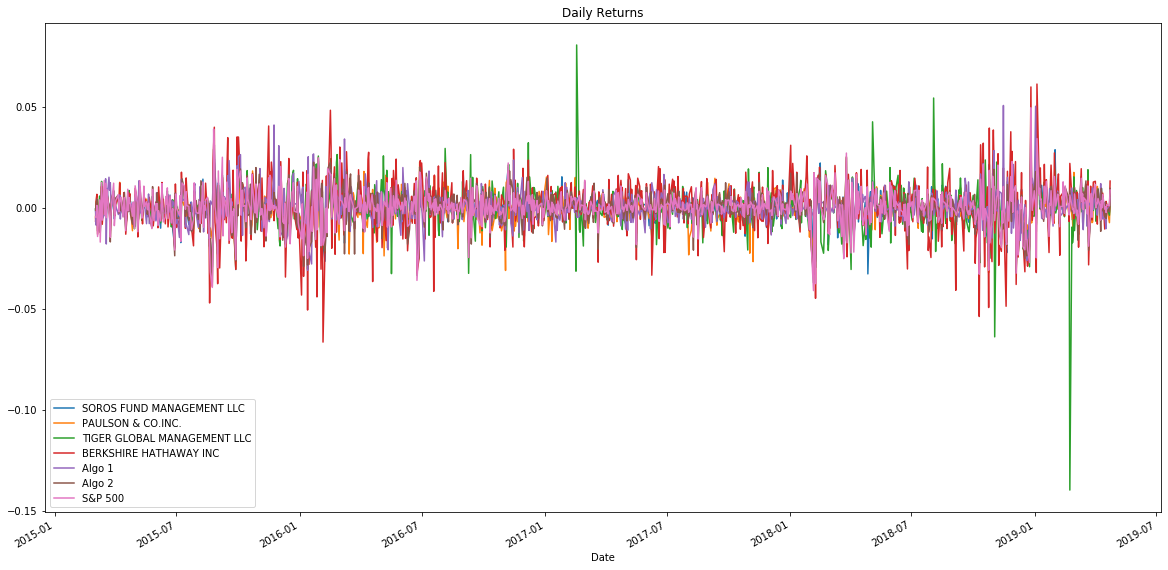

In [18]:
# Plot daily returns
portfolio_returns.plot(figsize=(20,10), title='Daily Returns')

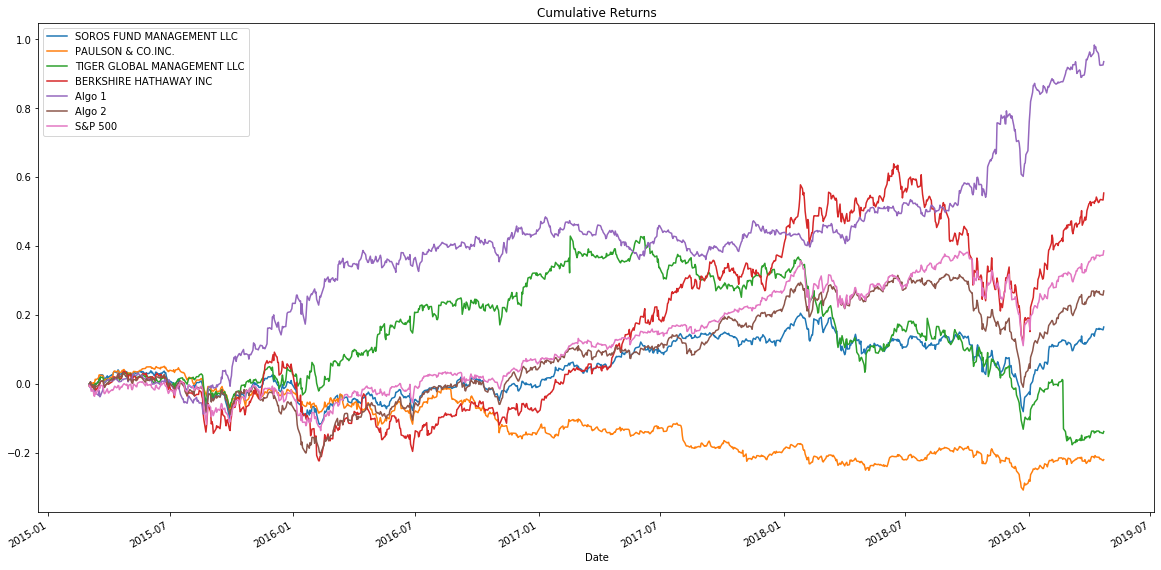

In [19]:
# Plot cumulative returns (cumu)
portfolio_returns_cumu = (1 + portfolio_returns).cumprod() -1
portfolio_returns_cumu.plot(figsize=(20,10), title='Cumulative Returns')

## Risk

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

While the median values in the box plots for all the porfilios are roughly the same centered around zero, each portfolio appears to be normally distributed with their median values falling in the middle of each box. Portfolio with the most dispersed data (largest box) is Berkshire Hathaway INC and portfolios with the least dispersed data (smallest box) are Algo 1, S&P 500 and Paulson & CO all very close.  When looking and the data spread, Berkshire Hathaway INC has the largest difference between its min and max values and Algo 1 with smallest.  Portfolio's that are riskier, having standard deviations greater than than the S&P 500 are:

BERKSHIRE HATHAWAY INC      = 0.012919

TIGER GLOBAL MANAGEMENT LLC = 0.010894

Lowest risk is:
PAULSON & CO.INC.  = 0.007023079026076193

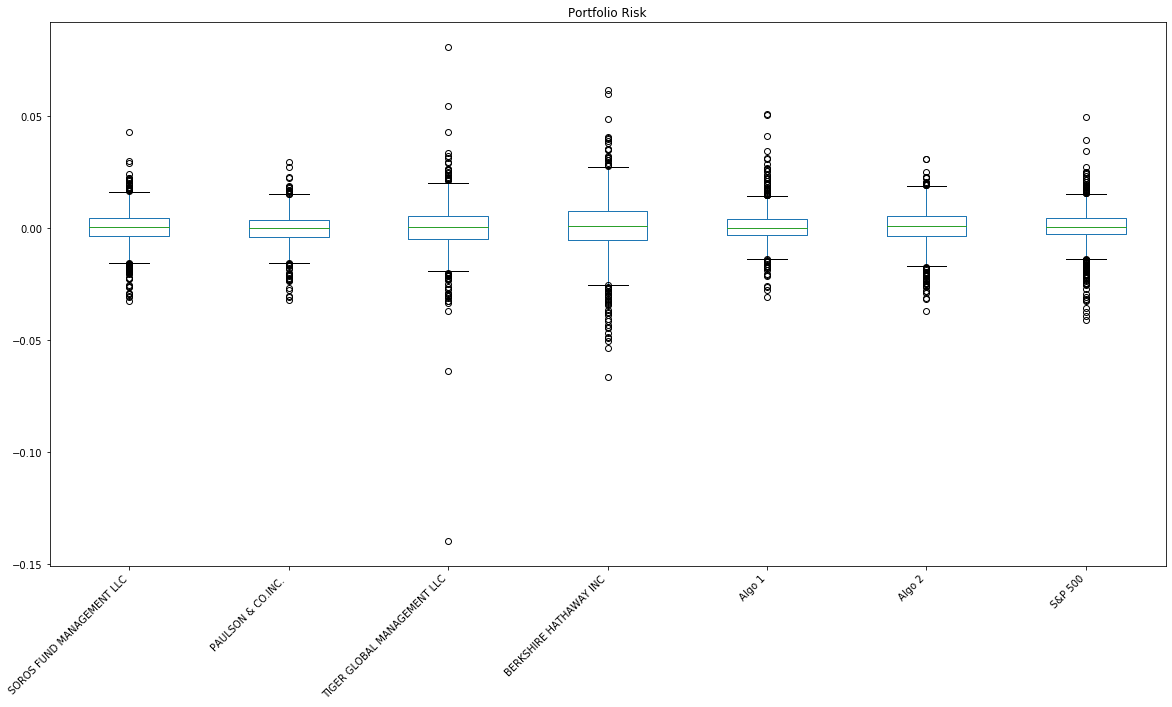

In [77]:
# Box plot to visually show risk. Which box has the largest spread? Which has the smallest spread?
portfolio_boxplot = portfolio_returns.plot(kind='box',figsize=(20,10), title='Portfolio Risk')
portfolio_boxplot.set_xticklabels(portfolio_boxplot.get_xticklabels(), rotation=45, horizontalalignment='right')
portfolio_boxplot

In [21]:
# Daily Standard Deviations
# Calculate the standard deviation for each portfolio. 
portfolio_returns_std = portfolio_returns.std()

portfolio_returns_std

SOROS FUND MANAGEMENT LLC      0.007895
PAULSON & CO.INC.              0.007023
TIGER GLOBAL MANAGEMENT LLC    0.010894
BERKSHIRE HATHAWAY INC         0.012919
Algo 1                         0.007620
Algo 2                         0.008342
S&P 500                        0.008554
dtype: float64

In [82]:
# Which portfolios are riskier than the S&P 500?
portfolio_returns_std.loc[portfolio_returns_std >= portfolio_returns_std['S&P 500']].sort_values(ascending=False)

BERKSHIRE HATHAWAY INC         0.012919
TIGER GLOBAL MANAGEMENT LLC    0.010894
S&P 500                        0.008554
dtype: float64

In [23]:
#Highest risk
max_risk_portfolio = portfolio_returns_std[portfolio_returns_std == portfolio_returns_std.max()].index[0]
max_risk_value = portfolio_returns_std.max()
print(f" Portfolio with the highest risk:{max_risk_portfolio} = {max_risk_value}")

 Portfolio with the highest risk:BERKSHIRE HATHAWAY INC = 0.012918618441883524


In [27]:
#Lowest risk
min_risk_portfolio = portfolio_returns_std[portfolio_returns_std == portfolio_returns_std.min()].index[0]
min_risk_value = portfolio_returns_std.min()
print(f" Portfolio with the lowesr risk: {min_risk_portfolio} = {min_risk_value}")

 Portfolio with the lowesr risk: PAULSON & CO.INC.  = 0.007023079026076193


In [25]:
# Determine which portfolios are riskier than the S&P 500
portfolio_returns_rsky = pd.Series(portfolio_returns_std.values > portfolio_returns_std['S&P 500'])
portfolio_returns_rsky.index=portfolio_returns_std.index
portfolio_returns_rsky

SOROS FUND MANAGEMENT LLC      False
PAULSON & CO.INC.              False
TIGER GLOBAL MANAGEMENT LLC     True
BERKSHIRE HATHAWAY INC          True
Algo 1                         False
Algo 2                         False
S&P 500                        False
dtype: bool

In [26]:
# Calculate the annualized standard deviation (252 trading days)
portfolio_returns_std_ann = portfolio_returns_std * np.sqrt(252)
portfolio_returns_std_ann

SOROS FUND MANAGEMENT LLC      0.125335
PAULSON & CO.INC.              0.111488
TIGER GLOBAL MANAGEMENT LLC    0.172936
BERKSHIRE HATHAWAY INC         0.205077
Algo 1                         0.120967
Algo 2                         0.132430
S&P 500                        0.135786
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Plot the rolling standard deviation of the various portfolios along with the rolling standard deviation of the S&P 500 (consider a 21 day window). Does the risk increase for each of the portfolios at the same time risk increases in the S&P?
2. Construct a correlation table for the algorithmic, whale, and S&P 500 returns. Which returns most closely mimic the S&P?
3. Choose one portfolio and plot a rolling beta between that portfolio's returns and S&P 500 returns. Does the portfolio seem sensitive to movements in the S&P 500?
4. An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the ewm with a 21 day half-life.

Upon observing the 21 day rolling standard deviation plot, risk increases for Soros Fund, Algo 1 and Algo 2 follow th S&P 500. Tiger Global follows closely as well with the excption of some sharp spikes in early 2017 and 2018.  Berkshire follows but at a high value, however Paulson & Co follows at a lower value.

The returns that closely mimic the S&P 500 is the Algo 2 with a positive correlation of 0.858764.  A close second is Soro's Fund with a positive correlation of 0.837864

As a comparison, Berkshire Hathaway was chosen to combare beta values against the S&P 500.  Berkshire does appear sensitive to the S&P with a Beta value of 1.1347891297491723 which means it follows at 13% higher then the S&P 500.

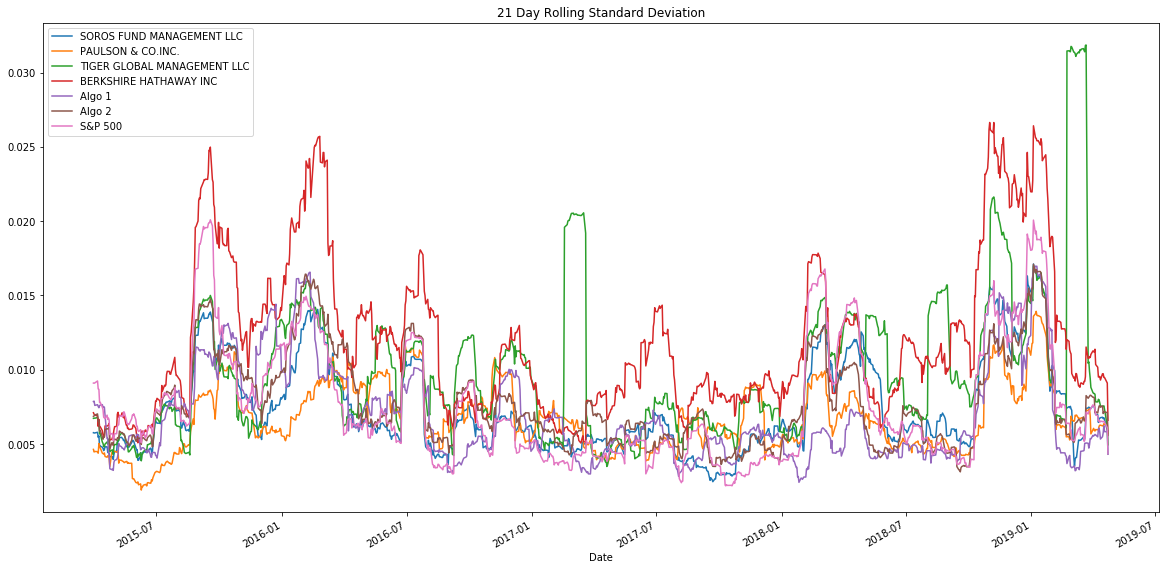

In [28]:
# Calculate and plot the rolling standard deviation for
# the S&P 500 and whale portfolios using a 21 trading day window
portfolio_returns.sort_index(inplace=True)
portfolio_returns.rolling(window=21).std().plot(figsize=(20,10), title='21 Day Rolling Standard Deviation')

In [29]:
# Construct a correlation table
portfolio_corr = portfolio_returns.corr()
portfolio_corr

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
SOROS FUND MANAGEMENT LLC,1.000000,0.699914,0.561243,0.754360,0.321211,0.826873,0.837864
PAULSON & CO.INC.,0.699914,1.000000,0.434479,0.545623,0.268840,0.678152,0.669732
TIGER GLOBAL MANAGEMENT LLC,0.561243,0.434479,1.000000,0.424423,0.164387,0.507414,0.623946
BERKSHIRE HATHAWAY INC,0.754360,0.545623,0.424423,1.000000,0.292033,0.688082,0.751371
Algo 1,0.321211,0.268840,0.164387,0.292033,1.000000,0.288243,0.279494
Algo 2,0.826873,0.678152,0.507414,0.688082,0.288243,1.000000,0.858764
S&P 500,0.837864,0.669732,0.623946,0.751371,0.279494,0.858764,1.000000


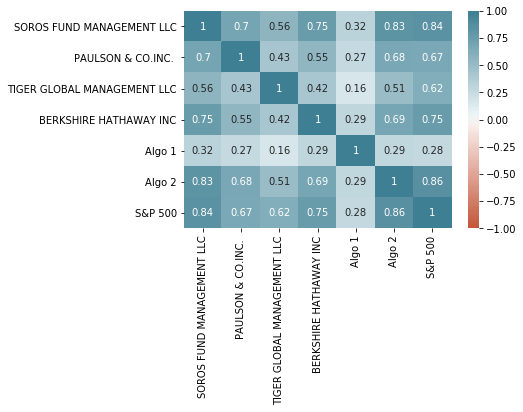

In [34]:
# Heatmap of correlations  Negative Correlation (Red) Positive (Blue)
sns.heatmap(portfolio_corr, vmin=-1, vmax=1,cmap=sns.diverging_palette(20, 220, n=200),annot = True)

In [35]:
# Calculate Beta for a single portfolio compared to the total market (S&P 500)
# (Your graph may differ, dependent upon which portfolio you are comparing)
sp500_variance = portfolio_returns['S&P 500'].var()
covariance = portfolio_returns['BERKSHIRE HATHAWAY INC'].cov(portfolio_returns['S&P 500'])
berk_beta = covariance/sp500_variance
berk_beta

1.1347891297491723

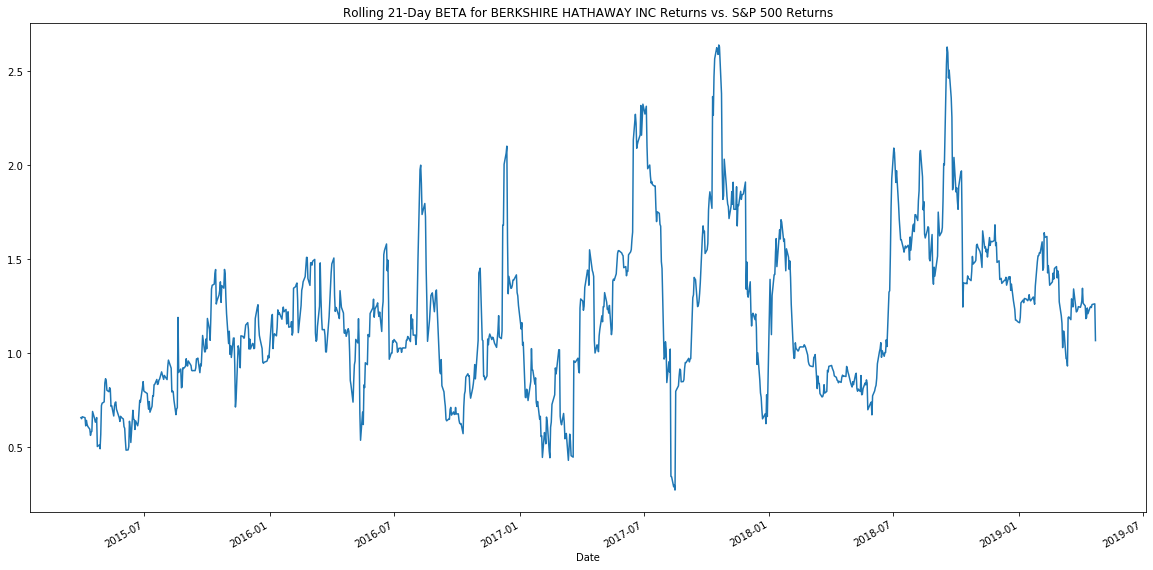

In [36]:
#Calculate 21-Day Rolling covariance of BERKSHIRE HATHAWAY INC Returns vs. S&P 500 Returns
berk_roll_cov = portfolio_returns['BERKSHIRE HATHAWAY INC'].rolling(window=21).cov(portfolio_returns['S&P 500'])

# Calculate 21-day rolling variance of S&P 500 Returns 
berk_roll_var = portfolio_returns['S&P 500'].rolling(window=21).var()

#Calculate rolling beta for BERKSHIRE HATHAWAY INC Returns
berk_roll_beta = berk_roll_cov / berk_roll_var

#Plot of 21-day BETA of BERKSHIRE HATHAWAY INC
berk_roll_beta.plot(figsize=(20, 10), title='Rolling 21-Day BETA for BERKSHIRE HATHAWAY INC Returns vs. S&P 500 Returns')

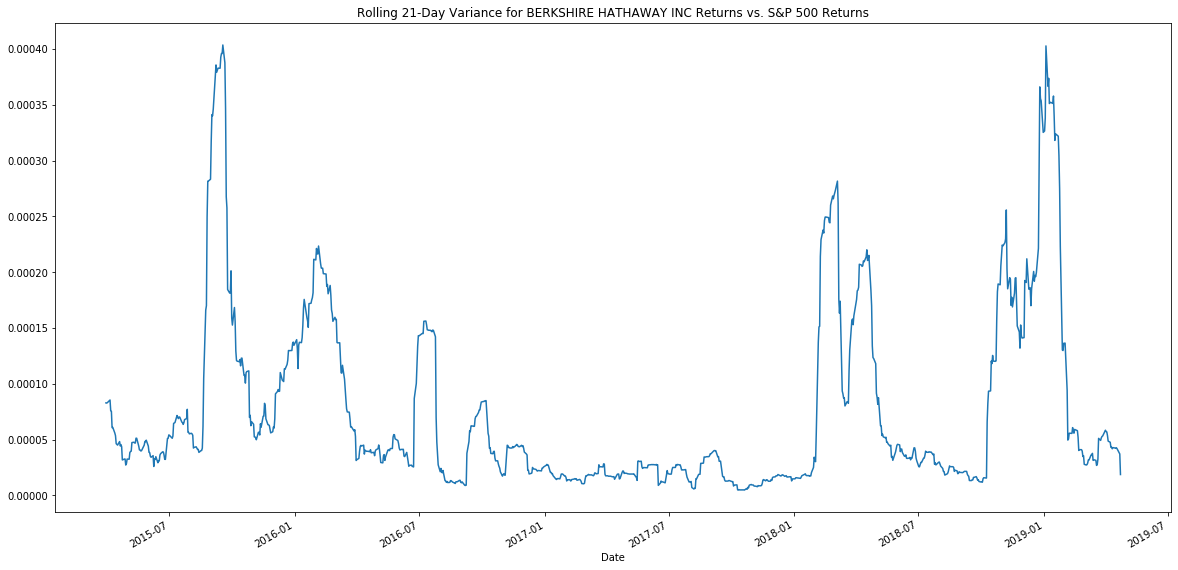

In [37]:
#Plot of 21-day variance of BERKSHIRE HATHAWAY INC
berk_roll_var.plot(figsize=(20, 10), title='Rolling 21-Day Variance for BERKSHIRE HATHAWAY INC Returns vs. S&P 500 Returns')

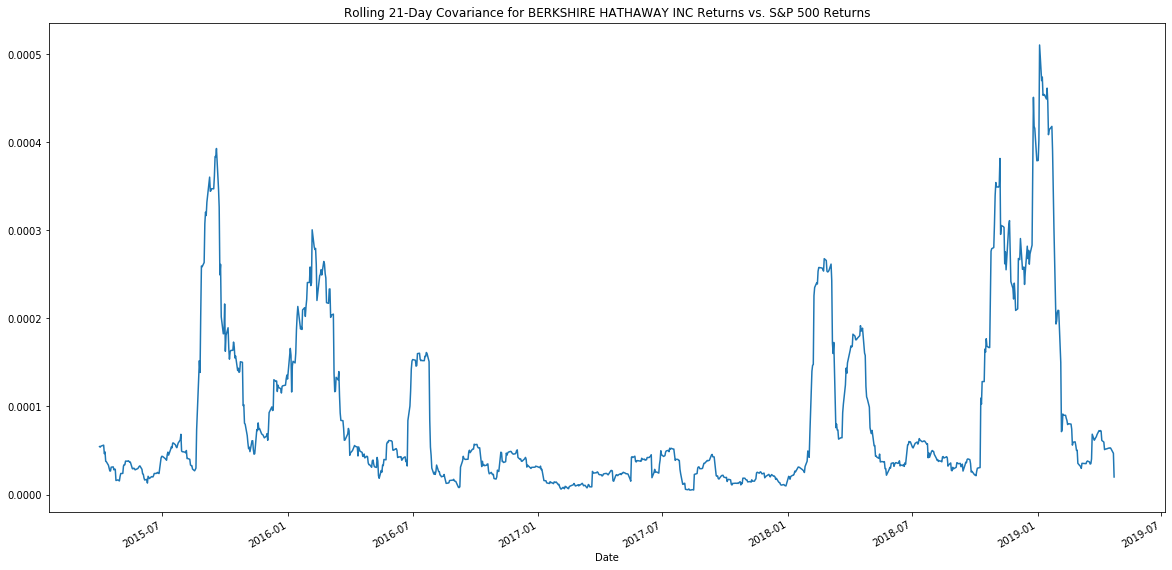

In [38]:
#Plot of 21-day covariance of BERKSHIRE HATHAWAY INC
berk_roll_cov.plot(figsize=(20, 10), title='Rolling 21-Day Covariance for BERKSHIRE HATHAWAY INC Returns vs. S&P 500 Returns')

In [ ]:
# Calculate a rolling window using the exponentially weighted moving average. 
# YOUR CODE HERE

---

## Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. (After all, if you could invest in one of two portfolios, each offered the same 10% return, yet one offered lower risk, you'd take that one, right?)

1. Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot.
2. Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

***On the basis of this performance metric, do our algo strategies outperform both 'the market' and the whales? Type your answer here:***

From the Sharpe Ratios and bar plot, Algo 1 out performs both the S&P 500 and all the Whale portfolios.  Berkshire Hathaway, Whale portfolio's top performer only slightly out performed Algo 2.

In [52]:
# Calculate annualized Sharpe Ratios (shrpr)

portfolio_returns_shrpr = (portfolio_returns.mean()*252)/(portfolio_returns_std*np.sqrt(252))
portfolio_returns_shrpr

SOROS FUND MANAGEMENT LLC      0.356417
PAULSON & CO.INC.             -0.483570
TIGER GLOBAL MANAGEMENT LLC   -0.121060
BERKSHIRE HATHAWAY INC         0.621810
Algo 1                         1.378648
Algo 2                         0.501364
S&P 500                        0.648267
dtype: float64

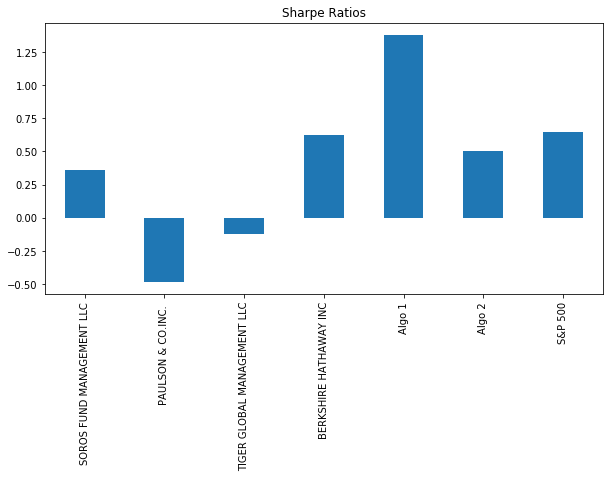

In [53]:
# Visualize the sharpe ratios as a bar plot
portfolio_returns_shrpr.plot(kind='bar',figsize=(10,5), title="Sharpe Ratios")

---

# Portfolio Returns

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Visit [Google Sheets](https://docs.google.com/spreadsheets/) and use the in-built Google Finance function to choose 3-5 stocks for your own portfolio.
2. Download the data as CSV files and calculate the portfolio returns.
3. Calculate the returns for each stock.
4. Using those returns, calculate the weighted returns for your entire portfolio assuming an equal number of shares for each stock.
5. Add your portfolio returns to the DataFrame with the other portfolios and rerun the analysis. How does your portfolio fair?


## Your analysis should include the following:

- Using all portfolios:
 - The annualized standard deviation (252 trading days) for all portfolios.
 - The plotted rolling standard deviation using a 21 trading day window for all portfolios.
 - The calculated annualized Sharpe Ratios and the accompanying bar plot visualization.
 - A correlation table.
- Using your custom portfolio and one other of your choosing:
 - The plotted beta. 

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [54]:
# Read the first stock - Google
# Call function to generate DataFrame
GOOG_price_hist = prep_dataframe_csv("goog_historical.csv", "Trade DATE")

# Sort DataFrame
GOOG_price_hist.sort_values("Trade DATE", ascending=True, inplace=True)
GOOG_price_hist.head()

,Symbol,NOCP
Trade DATE,,
2018-05-11,GOOG,1098.26
2018-05-14,GOOG,1100.20
2018-05-15,GOOG,1079.23
2018-05-16,GOOG,1081.77
2018-05-17,GOOG,1078.59


In [55]:
# Read the second stock - Apple
# Call function to generate DataFrame
AAPL_price_hist = prep_dataframe_csv("aapl_historical.csv","Trade DATE")

# Sort DataFrame
AAPL_price_hist.sort_values("Trade DATE", ascending=True, inplace=True)
AAPL_price_hist.head()

,Symbol,NOCP
Trade DATE,,
2018-05-11,AAPL,188.59
2018-05-14,AAPL,188.15
2018-05-15,AAPL,186.44
2018-05-16,AAPL,188.18
2018-05-17,AAPL,186.99


In [56]:
# Read the third stock - Costco
# Call function to generate DataFrame
COST_price_hist = prep_dataframe_csv("cost_historical.csv","Trade DATE")

# Sort DataFrame
COST_price_hist.sort_values("Trade DATE", ascending=True, inplace=True)
COST_price_hist.head()

,Symbol,NOCP
Trade DATE,,
2018-05-11,COST,195.76
2018-05-14,COST,195.88
2018-05-15,COST,195.48
2018-05-16,COST,198.71
2018-05-17,COST,199.60


In [57]:
# Read the forth stock - Shopify
# Call function to generate DataFrame
SHOP_price_hist = prep_dataframe_csv("shop_historical.csv","Date")

# Format DataFrame to be consistant with other DataFrame, add Symbol column
SHOP_price_hist = prep_dataframe_columns(SHOP_price_hist,"SHOP")

# Sort DataFrame
SHOP_price_hist.sort_values("Trade DATE", ascending=True, inplace=True)
SHOP_price_hist.head()

,Symbol,NOCP
Trade DATE,,
2015-05-21,SHOP,25.68
2015-05-22,SHOP,28.31
2015-05-26,SHOP,29.65
2015-05-27,SHOP,27.50
2015-05-28,SHOP,27.45


In [58]:
# Read the fifth stock - Intuit
# Call function to generate DataFrame
INTU_price_hist = prep_dataframe_csv("intu_returns.csv","Date")

# Format DataFrame to be consistant with other DataFrame, add Symbol column
INTU_price_hist = prep_dataframe_columns(INTU_price_hist,"INTU")

# Sort DataFrame
INTU_price_hist.sort_values("Trade DATE", ascending=True, inplace=True)
INTU_price_hist.head()

,Symbol,NOCP
Trade DATE,,
2012-10-01,INTU,59.34
2012-10-02,INTU,59.85
2012-10-03,INTU,61.07
2012-10-04,INTU,61.07
2012-10-05,INTU,61.12


In [59]:
# Concatenate all stocks into a single DataFrame
my_portfolio_hist = pd.concat([GOOG_price_hist, AAPL_price_hist, COST_price_hist, SHOP_price_hist,INTU_price_hist], axis="rows", join="inner")
my_portfolio_hist.head()

,Symbol,NOCP
Trade DATE,,
2018-05-11,GOOG,1098.26
2018-05-14,GOOG,1100.20
2018-05-15,GOOG,1079.23
2018-05-16,GOOG,1081.77
2018-05-17,GOOG,1078.59


In [60]:
# Reset the index
my_portfolio_hist = my_portfolio_hist.reset_index()
my_portfolio_hist.head()

,Trade DATE,Symbol,NOCP
0,2018-05-11,GOOG,1098.26
1,2018-05-14,GOOG,1100.20
2,2018-05-15,GOOG,1079.23
3,2018-05-16,GOOG,1081.77
4,2018-05-17,GOOG,1078.59


In [61]:
# Pivot so that each column of prices represents a unique symbol
my_portfolio_hist = my_portfolio_hist.pivot(columns="Symbol", values="NOCP", index="Trade DATE").copy()
my_portfolio_hist.head()

Symbol,AAPL,COST,GOOG,INTU,SHOP
Trade DATE,,,,,
2012-10-01,NaN,NaN,NaN,59.34,NaN
2012-10-02,NaN,NaN,NaN,59.85,NaN
2012-10-03,NaN,NaN,NaN,61.07,NaN
2012-10-04,NaN,NaN,NaN,61.07,NaN
2012-10-05,NaN,NaN,NaN,61.12,NaN


In [62]:
# Drop Nulls
my_portfolio_hist.dropna(inplace=True)
my_portfolio_hist.head()

Symbol,AAPL,COST,GOOG,INTU,SHOP
Trade DATE,,,,,
2018-05-11,188.59,195.76,1098.26,194.20,144.47
2018-05-14,188.15,195.88,1100.20,192.59,142.64
2018-05-15,186.44,195.48,1079.23,189.77,142.50
2018-05-16,188.18,198.71,1081.77,190.41,142.28
2018-05-17,186.99,199.60,1078.59,189.78,146.10


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [63]:
# Calculate Daily Returns
my_portfolio_returns = my_portfolio_hist.pct_change().copy()
my_portfolio_returns

# Calculate weighted portfolio returns
AAPL_weight = 0.2
COST_weight = 0.2
GOOG_weight = 0.2
INTU_weight = 0.2
SHOP_weight = 0.2

my_portfolio_returns = AAPL_weight * my_portfolio_returns["AAPL"] + COST_weight * my_portfolio_returns["COST"] + GOOG_weight * my_portfolio_returns["GOOG"] + INTU_weight * my_portfolio_returns["INTU"] + SHOP_weight * my_portfolio_returns["SHOP"]
my_portfolio_returns.rename_axis("Date", inplace=True)
my_portfolio_returns.head()

Date
2018-05-11         NaN
2018-05-14   -0.004182
2018-05-15   -0.009163
2018-05-16    0.006008
2018-05-17    0.003751
dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [64]:
# Add your "Custom" portfolio to the larger dataframe of fund returns
cust_portfolio_returns = pd.concat([portfolio_returns,my_portfolio_returns],axis="columns", join="inner")
cust_portfolio_returns.rename(columns={0:"Custom"},inplace=True)
cust_portfolio_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500,Custom
Date,,,,,,,,
2018-05-11,-0.004717,0.000982,0.002624,-0.004125,0.000358,0.000281,0.001708,NaN
2018-05-14,0.000000,0.000000,0.000000,0.000000,0.000915,0.001635,0.000884,-0.004182
2018-05-15,-0.000726,-0.001409,-0.003189,-0.014606,-0.001135,-0.001139,-0.006842,-0.009163
2018-05-16,0.008637,0.006244,0.005480,0.004310,-0.002326,0.003341,0.004061,0.006008
2018-05-17,-0.001955,0.002524,-0.006267,-0.005140,-0.006949,0.005205,-0.000856,0.003751


In [128]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
cust_portfolio_returns.dropna(inplace=True)
cust_portfolio_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500,Custom
Date,,,,,,,,
2018-05-14,0.000000,0.000000,0.000000,0.000000,0.000915,0.001635,0.000884,-0.004182
2018-05-15,-0.000726,-0.001409,-0.003189,-0.014606,-0.001135,-0.001139,-0.006842,-0.009163
2018-05-16,0.008637,0.006244,0.005480,0.004310,-0.002326,0.003341,0.004061,0.006008
2018-05-17,-0.001955,0.002524,-0.006267,-0.005140,-0.006949,0.005205,-0.000856,0.003751
2018-05-18,-0.004357,-0.002672,-0.012832,-0.002212,0.002557,-0.002496,-0.002632,-0.001521


## Re-run the performance and risk analysis with your portfolio to see how it compares to the others

## Risk

***It should be noted that from the previous analysis, the data sample spanned from 2015 to 2019.  Time frame of the custom portfolio analisys spans Jun 2018 to May 2019.  This will impact the results of the analysis.***

Median values in the box plots for our Custom portolio is higher then the S&P 500 but appears to be normally distributed with the median value falling in the middle of the box. Data has about the same dispersment as than that of Berkshire Hathaway but more dispersed the S&P 500. When looking at the data spread, Berkshire Hathaway INC has the same difference between its min and max values as our Custom portfolio. The Custom Portfolio now has the higher standard deviation that is greater than the S&P 500 :

Custom = 0.016014

BERKSHIRE HATHAWAY INC = 0.015569

TIGER GLOBAL MANAGEMENT LLC = 0.014648

Lowest risk is: PAULSON & CO.INC. = 0.007353

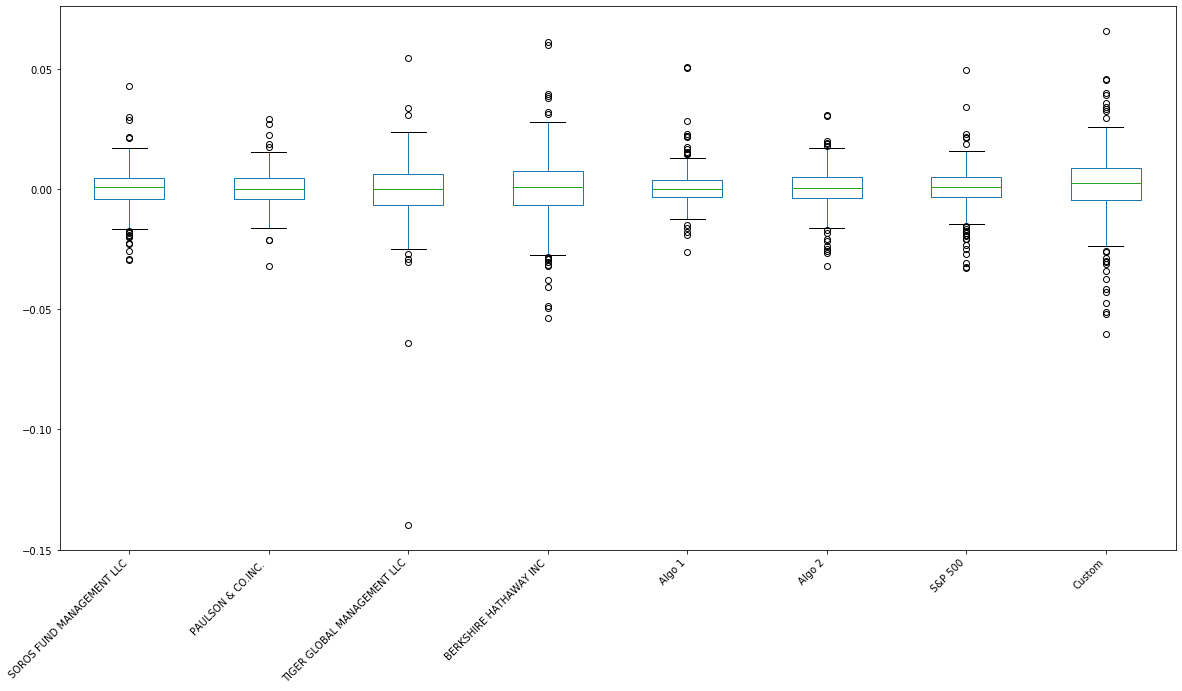

In [78]:
# Risk
# Box plot to visually show risk
cust_port_boxplot = cust_portfolio_returns.plot(kind='box', figsize=(20,10))
cust_port_boxplot.set_xticklabels(cust_port_boxplot.get_xticklabels(), rotation=45, horizontalalignment='right')
cust_port_boxplot

In [83]:
# Calculate the standard deviation for each portfolio. 
 = cust_portfolio_returns.std()
cust_port_returns_std

SOROS FUND MANAGEMENT LLC      0.009240
PAULSON & CO.INC.              0.007353
TIGER GLOBAL MANAGEMENT LLC    0.014648
BERKSHIRE HATHAWAY INC         0.015569
Algo 1                         0.008423
Algo 2                         0.008791
S&P 500                        0.009578
Custom                         0.016014
dtype: float64

In [85]:
# Which portfolios are riskier than the S&P 500?
cust_port_returns_std.loc[cust_port_returns_std >= cust_port_returns_std['S&P 500']].sort_values(ascending=False)

Custom                         0.016014
BERKSHIRE HATHAWAY INC         0.015569
TIGER GLOBAL MANAGEMENT LLC    0.014648
S&P 500                        0.009578
dtype: float64

In [86]:
#Highest risk
cust_max_risk_port = cust_port_returns_std[cust_port_returns_std == cust_port_returns_std.max()].index[0]
cust_max_risk_value = cust_port_returns_std.max()
print(f" Portfolio with the highest risk:{cust_max_risk_port} = {cust_max_risk_value}")

 Portfolio with the highest risk:Custom = 0.0160144120989599


In [87]:
#Lowest risk
cust_min_risk_port = cust_port_returns_std[cust_port_returns_std == cust_port_returns_std.min()].index[0]
cust_min_risk_value = cust_port_returns_std.min()
print(f" Portfolio with the lowesr risk:{cust_min_risk_port} = {cust_min_risk_value}")

 Portfolio with the lowesr risk:PAULSON & CO.INC.  = 0.0073534161104486144


## Rolling Statistics

Upon observing the 21 day rolling standard deviation plot, risk increases for Soros Fund, Algo 1 and Algo 2 follow the S&P 500. Tiger Global follows closely as well with the 
excption of a large sharp spike in 2019-03/04. Our Custom portfolio follows at a higher rate close to Berkshire Hathaway.

The returns that closely mimic the S&P 500 is the Soro's Fund with a positive correlation of 0.876981. A close second is Algo 1 Fund with a positive correlation of 0.875721.  Our Custom portfolio is positivily corralated with the S&P 500 with a value of 0.866738

For a comparison, Berkshire Hathaway, Algo 2 and the Custom portfolio was chosen to combare beta values against the S&P 500. Berkshire and the Custom portfolios are sensitive to the S&P with the Custom portfolio
Beta value of 1.4491106488679828 which means it follows at 44% higher value in relation to the S&P 500.  If we look at the 21-day Beta graph, we can see how similar our Custom portfolio and Berkshire Hathaway are, being more volitile than Algo 2 when compared with the S&P 500


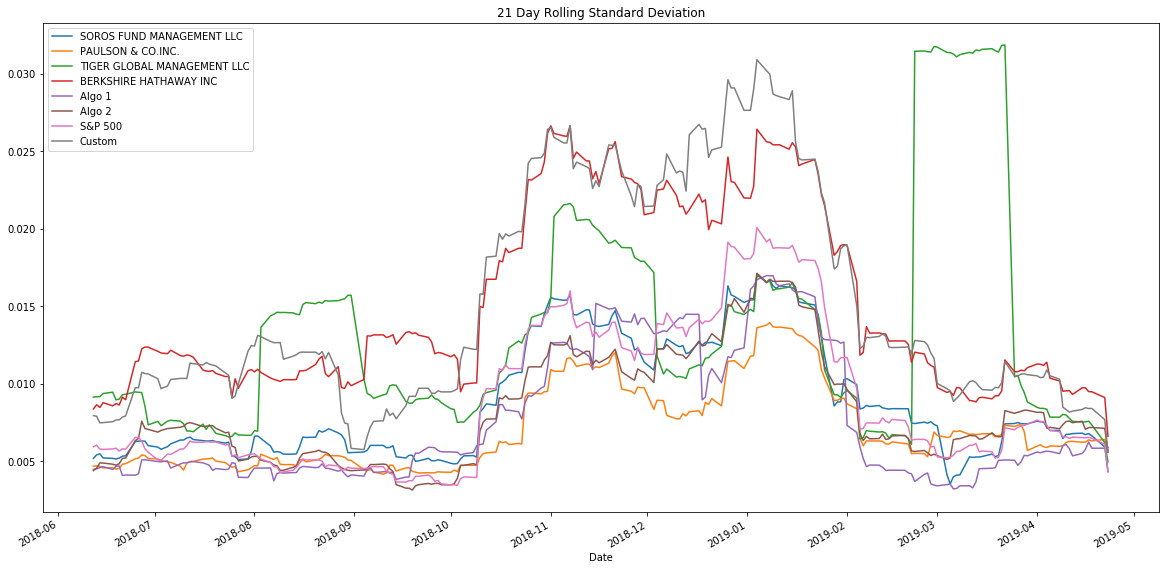

In [88]:
# Calculate and plot the rolling standard deviation for
# the S&P 500 and whale portfolios using a 21 trading day window
cust_portfolio_returns.sort_index(inplace=True)
cust_portfolio_returns.rolling(window=21).std().plot(figsize=(20,10), title='21 Day Rolling Standard Deviation')

In [91]:
# Construct a correlation table
cust_port_corr = cust_portfolio_returns.corr()
cust_port_corr

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500,Custom
SOROS FUND MANAGEMENT LLC,1.000000,0.791962,0.478627,0.816675,0.337826,0.862846,0.876981,0.764337
PAULSON & CO.INC.,0.791962,1.000000,0.485375,0.650758,0.361301,0.783656,0.766680,0.611764
TIGER GLOBAL MANAGEMENT LLC,0.478627,0.485375,1.000000,0.325457,0.114554,0.409496,0.481030,0.302136
BERKSHIRE HATHAWAY INC,0.816675,0.650758,0.325457,1.000000,0.327000,0.782804,0.852303,0.864132
Algo 1,0.337826,0.361301,0.114554,0.327000,1.000000,0.365512,0.289358,0.271438
Algo 2,0.862846,0.783656,0.409496,0.782804,0.365512,1.000000,0.875721,0.775441
S&P 500,0.876981,0.766680,0.481030,0.852303,0.289358,0.875721,1.000000,0.866738
Custom,0.764337,0.611764,0.302136,0.864132,0.271438,0.775441,0.866738,1.000000


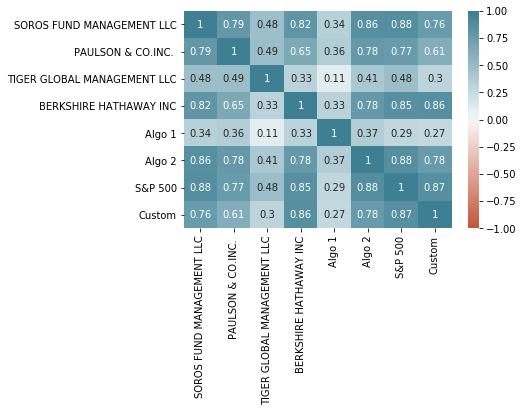

In [93]:
# Heatmap of correlations  Negative Correlation (Red) Positive (Blue)
sns.heatmap(cust_port_corr, vmin=-1, vmax=1,cmap=sns.diverging_palette(20, 220, n=200),annot = True)

In [101]:
# Calculate Beta for BERKSHIRE HATHAWAY INC, Custom and Algo 2 compared to the total market (S&P 500)

# Calculate variance of all daily returns of portfolios vs. S&P 500
cust_sp500_var = cust_portfolio_returns['S&P 500'].var()

In [102]:
# Calculate covariance of all daily returns for BERKSHIRE HATHAWAY INC, Custom and Algo 2 vs. S&P 500
cust_covariance = cust_portfolio_returns['Custom'].cov(cust_portfolio_returns['S&P 500'])
algo_covariance = cust_portfolio_returns['Algo 2'].cov(cust_portfolio_returns['S&P 500'])
berk_covariance = cust_portfolio_returns['BERKSHIRE HATHAWAY INC'].cov(cust_portfolio_returns['S&P 500'])

In [103]:
# Calculate beta of BERKSHIRE HATHAWAY INC, Custom and Algo 2 vs. S&P 500
cust_beta = cust_covariance / cust_sp500_var
algo_beta = algo_covariance / cust_sp500_var
berk_beta = berk_covariance / cust_sp500_var

print("Beta Values")
print(f"Custom: {cust_beta} | Algo 2: {algo_beta} | BERKSHIRE HATHAWAY INC: {berk_beta}")

Beta Values
Custom: 1.4491106488679828 | Algo 2: 0.8037439333709113 | BERKSHIRE HATHAWAY INC: 1.3853682313573936


In [113]:
# Calculate 21-day rolling covariance of BERKSHIRE HATHAWAY INC, Custom and Algo 2 vs. S&P 500
cust_roll_cov = cust_portfolio_returns['Custom'].rolling(window=21).cov(cust_portfolio_returns['S&P 500'])
cust_algo_roll_cov = cust_portfolio_returns['Algo 2'].rolling(window=21).cov(cust_portfolio_returns['S&P 500'])
cust_berk_roll_cov = cust_portfolio_returns['BERKSHIRE HATHAWAY INC'].rolling(window=21).cov(cust_portfolio_returns['S&P 500'])

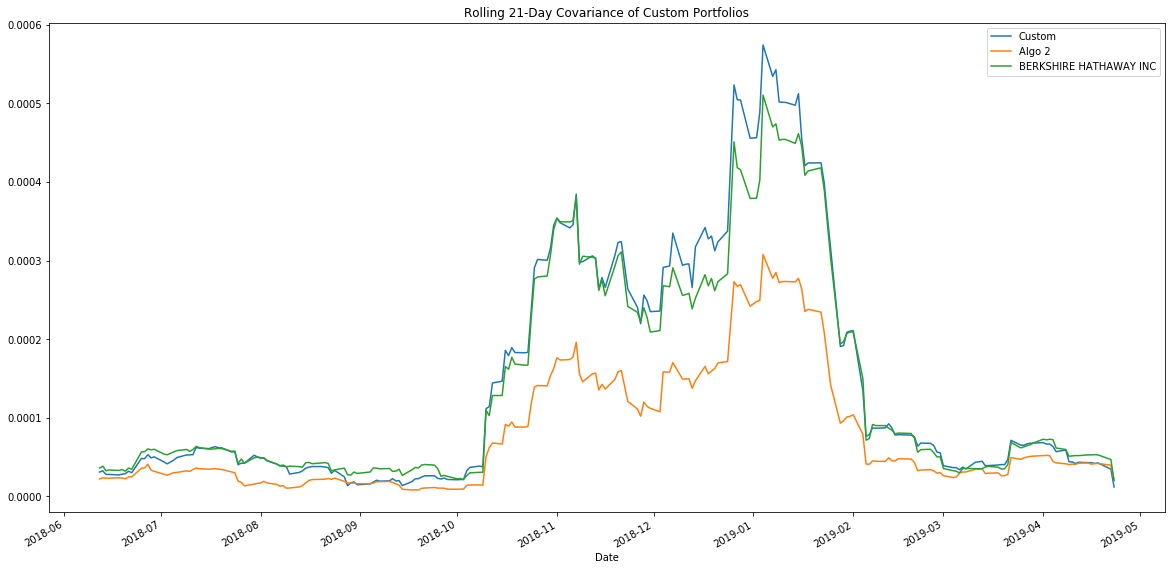

In [134]:
#Plot of 21-day covariance of BERKSHIRE HATHAWAY INC
ax = cust_roll_cov.plot(figsize=(20, 10), title='Rolling 21-Day Covariance of Custom Portfolios')
cust_algo_roll_cov.plot(ax=ax)
cust_berk_roll_cov.plot(ax=ax)

# Set the legend of the figure
ax.legend(["Custom", "Algo 2", "BERKSHIRE HATHAWAY INC"])

In [114]:
# Calculate 21-day rolling variance of S&P 500
cust_sp500_roll_var = cust_portfolio_returns['S&P 500'].rolling(window=21).var()

In [116]:
# Calculate 21-day rolling beta of BERKSHIRE HATHAWAY INC, Custom and Algo 2 vs. S&P 500
cust_roll_beta = cust_roll_cov / cust_sp500_roll_var
cust_algo_roll_beta = cust_algo_roll_cov / cust_sp500_roll_var
cust_berk_roll_beta = cust_berk_roll_cov / cust_sp500_roll_var

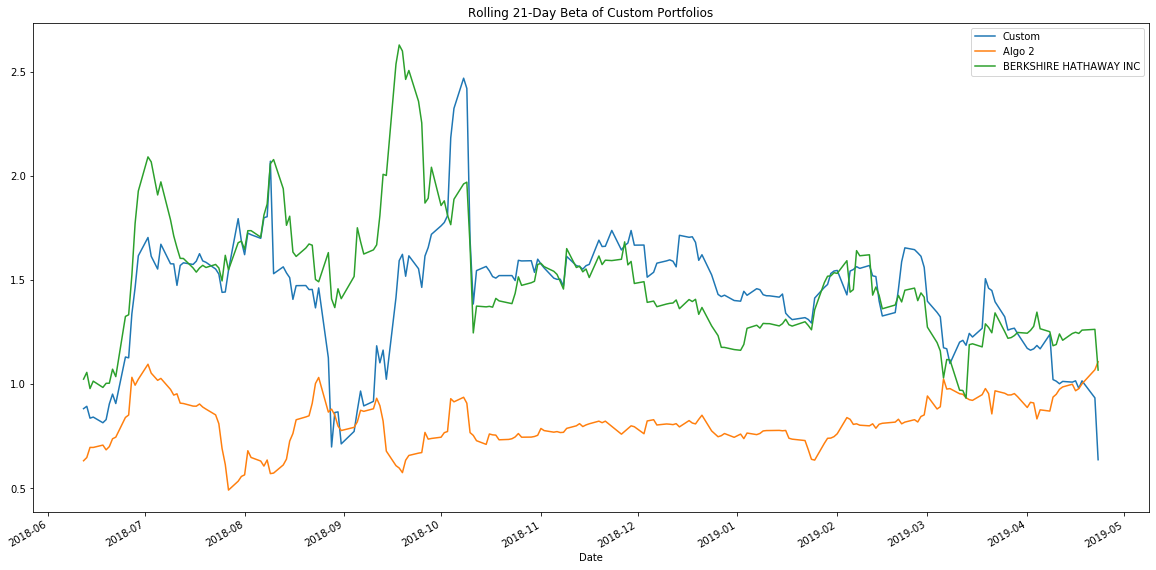

In [119]:
# Plot the different datasets on same graph.
ax = cust_roll_beta.plot(figsize=(20, 10), title='Rolling 21-Day Beta of Custom Portfolios')
cust_algo_roll_beta.plot(ax=ax)
cust_berk_roll_beta.plot(ax=ax)

# Set the legend of the figure
ax.legend(["Custom", "Algo 2", "BERKSHIRE HATHAWAY INC"])

## Sharpe Ratio

From the Sharpe Ratios and bar plot, Algo 1 still out performs both the S&P 500 and all the Whale portfolios including the Custom portfolio.  The Custom portfolio placed second.

In [135]:
# Calculate annualized Sharpe Ratios (shrpr)

cust_port_returns_shrpr = (cust_portfolio_returns.mean()*252)/(cust_port_returns_std*np.sqrt(252))
cust_port_returns_shrpr

Algo 1                         2.035665
Algo 2                         0.080607
BERKSHIRE HATHAWAY INC         0.159756
Custom                         1.227038
PAULSON & CO.INC.              0.258738
S&P 500                        0.584820
SOROS FUND MANAGEMENT LLC      0.430713
TIGER GLOBAL MANAGEMENT LLC   -1.034216
dtype: float64

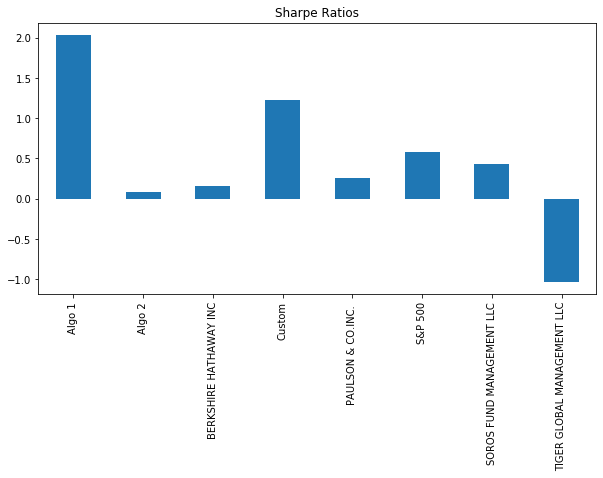

In [132]:
# Visualize the sharpe ratios as a bar plot
cust_port_returns_shrpr.plot(kind='bar',figsize=(10,5), title="Sharpe Ratios")